In [1]:
data(iris)

In [2]:
# install.packages("infotheo")
library(infotheo)

### we have to discretize data for using mutual information. 
for 'disc' you can choose 'cluster', 'adaptive', 'equalwidth'

In [25]:
# disc = 'equalfreq' puts the data into bins with equal frequency, nbins is the number of bins
discretized_iris = discretize(iris, disc = "equalfreq", nbins = 3)

In [26]:
dim( discretized_iris )

[1] 150   5

In [27]:
head( iris )

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [28]:
unique(discretized_iris$Species)

[1] 1 2 3

In [29]:
head( discretized_iris )

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<int>,<int>,<int>,<int>,<int>
1,1,3,1,1,1
2,1,2,1,1,1
3,1,2,1,1,1
4,1,2,1,1,1
5,1,3,1,1,1
6,1,3,1,1,1


In [30]:
unique( discretized_iris$Petal.Length )

[1] 1 2 3

In [31]:
# mutual information between features and the target (flower species)
mi_scores = numeric()
features = names(discretized_iris)[names(discretized_iris) != "Species"]

for (feature in features) {
  mi = mutinformation(discretized_iris[[feature]], discretized_iris$Species)
  mi_scores[feature] = mi
}

print(mi_scores)


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.4484320    0.2475453    0.9181870    0.9491743 


In [32]:
mi_df = data.frame(
  Feature = names(mi_scores),
  Mutual_Information = as.numeric(mi_scores),
  row.names = NULL
)

In [33]:
#order the features by mutual information in descending order
mi_df = mi_df[order(mi_df$Mutual_Information, decreasing = TRUE), ]

print(mi_df)

       Feature Mutual_Information
4  Petal.Width          0.9491743
3 Petal.Length          0.9181870
1 Sepal.Length          0.4484320
2  Sepal.Width          0.2475453


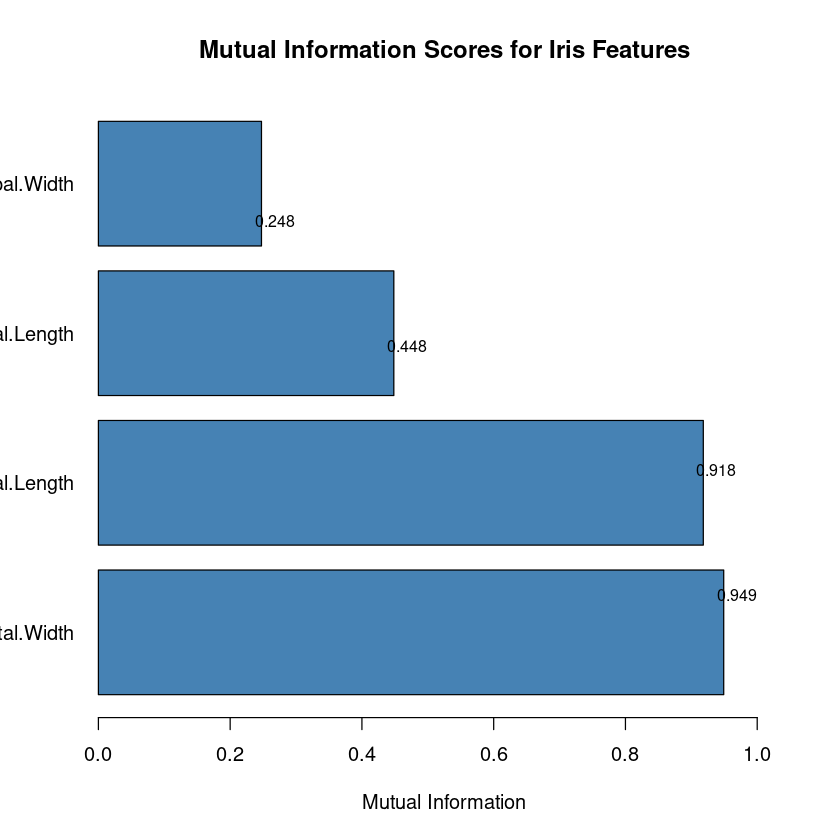

In [34]:
bar_heights = mi_df$Mutual_Information

feature_names = mi_df$Feature

barplot(
  height = bar_heights,
  names.arg = feature_names,
  horiz = TRUE,            
  las = 1,                 
  col = "steelblue",
  main = "Mutual Information Scores for Iris Features",
  xlab = "Mutual Information",
  border = "black",
  xlim = c(0, max(bar_heights) + 0.1) 
)

text(
  x = bar_heights + 0.02,  
  y = seq_along(bar_heights),
  labels = round(bar_heights, 3),
  cex = 0.8,
  col = "black"
)

In [35]:
# Select the top 2 features based on mutual information
top_features = head(mi_df$Feature, 2)
print(top_features)


[1] "Petal.Width"  "Petal.Length"


In [23]:
library(caret)
library(rpart)

selected_data = iris[, c(top_features, "Species")]

train_index = createDataPartition(selected_data$Species, p = 0.7, list = FALSE)
train_data = selected_data[train_index, ]
test_data  = selected_data[-train_index, ]

model = train(Species ~ ., data = train_data, method = "rpart")
predictions = predict(model, newdata = test_data)

confusionMatrix(predictions, test_data$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8667           0.9333
Specificity                 1.0000            0.9667           0.9333
Pos Pred Value              1.0000            0.9286           0.8750
Neg Pred Value              1.0000            0.9355           0.9655
Prevalence

In [14]:
miami_data = read.csv("miami-housing.csv", stringsAsFactors = TRUE)

In [15]:
str( miami_data )

'data.frame':	13932 obs. of  17 variables:
 $ LATITUDE         : num  25.9 25.9 25.9 25.9 25.9 ...
 $ LONGITUDE        : num  -80.2 -80.2 -80.2 -80.2 -80.2 ...
 $ PARCELNO         : num  6.22e+11 6.22e+11 6.22e+11 6.22e+11 6.22e+11 ...
 $ SALE_PRC         : num  440000 349000 800000 988000 755000 630000 1020000 850000 250000 1220000 ...
 $ LND_SQFOOT       : int  9375 9375 9375 12450 12800 9900 10387 10272 9375 13803 ...
 $ TOT_LVG_AREA     : int  1753 1715 2276 2058 1684 1531 1753 1663 1493 3077 ...
 $ SPEC_FEAT_VAL    : int  0 0 49206 10033 16681 2978 23116 34933 11668 34580 ...
 $ RAIL_DIST        : num  2816 4359 4413 4585 4063 ...
 $ OCEAN_DIST       : num  12811 10648 10574 10156 10837 ...
 $ WATER_DIST       : num  348 338 297 0 327 ...
 $ CNTR_DIST        : num  42815 43505 43530 43798 43600 ...
 $ SUBCNTR_DI       : num  37742 37340 37329 37423 37551 ...
 $ HWY_DIST         : num  15955 18125 18200 18514 17903 ...
 $ age              : int  67 63 61 63 42 41 63 21 56 63 ...
 $

In [16]:
data = miami_data[, !names(miami_data) %in% c("PARCELNO")] #irrelavant data

In [17]:
dim( data )

[1] 13932    16

In [18]:
sum( is.na(data) )

[1] 0

In [19]:
data = na.omit( data ) #if there were NAs in this data

In [20]:
dim( data )

[1] 13932    16

In [21]:
discrete_data = discretize(data, disc = "equalfreq", nbins = 10)

In [22]:
target = discrete_data$SALE_PRC

In [23]:
predictor_vars = setdiff(names(discrete_data), "SALE_PRC")
predictor_vars

[1] "LATITUDE"          "LONGITUDE"         "LND_SQFOOT"       
 [4] "TOT_LVG_AREA"      "SPEC_FEAT_VAL"     "RAIL_DIST"        
 [7] "OCEAN_DIST"        "WATER_DIST"        "CNTR_DIST"        
[10] "SUBCNTR_DI"        "HWY_DIST"          "age"              
[13] "avno60plus"        "month_sold"        "structure_quality"

In [24]:
mi_values = numeric(length(predictor_vars))
names(mi_values) = predictor_vars

In [25]:
mi_values

LATITUDE         LONGITUDE        LND_SQFOOT      TOT_LVG_AREA 
                0                 0                 0                 0 
    SPEC_FEAT_VAL         RAIL_DIST        OCEAN_DIST        WATER_DIST 
                0                 0                 0                 0 
        CNTR_DIST        SUBCNTR_DI          HWY_DIST               age 
                0                 0                 0                 0 
       avno60plus        month_sold structure_quality 
                0                 0                 0

In [26]:
for (var in predictor_vars) {
  mi_values[var] = mutinformation(discrete_data[[var]], target)
}

In [27]:
mi_values_sorted = sort(mi_values, decreasing = TRUE)

print(mi_values_sorted)

     TOT_LVG_AREA          LATITUDE        OCEAN_DIST         LONGITUDE 
      0.337525334       0.197538344       0.181174508       0.180427049 
        CNTR_DIST structure_quality        SUBCNTR_DI     SPEC_FEAT_VAL 
      0.167070236       0.156832563       0.144626557       0.132954813 
       LND_SQFOOT        WATER_DIST          HWY_DIST               age 
      0.129938563       0.096752342       0.078486605       0.066676931 
        RAIL_DIST        month_sold        avno60plus 
      0.033715094       0.006006276       0.001354597 


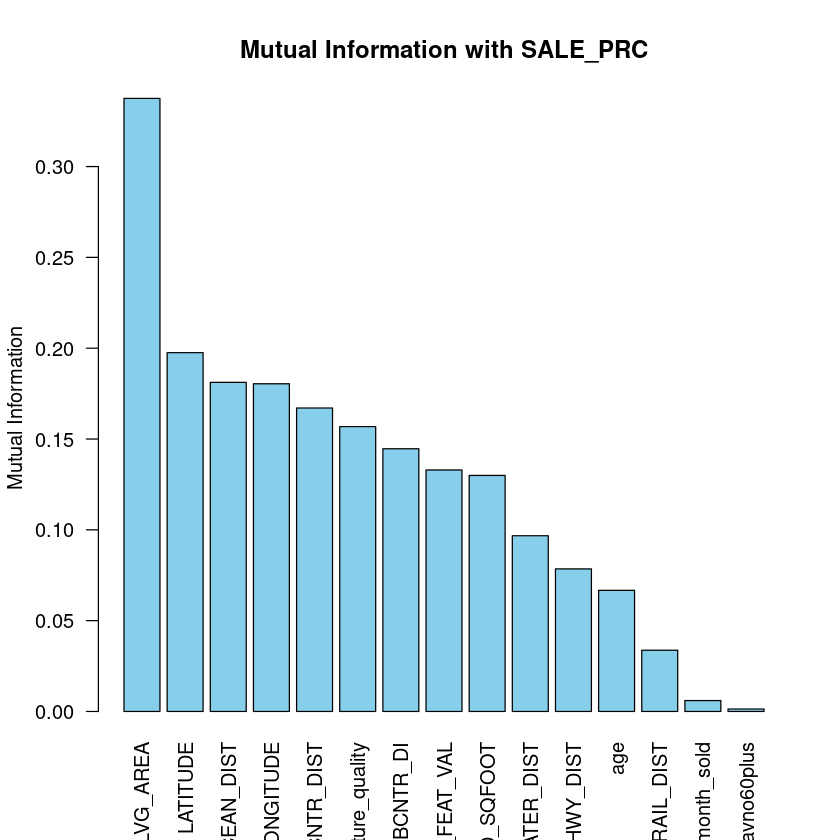

In [28]:
barplot(mi_values_sorted, las = 2, col = "skyblue",
        main = "Mutual Information with SALE_PRC",
        ylab = "Mutual Information")

In [115]:
# minerva, hanldes continuous data directly ( Maximal Information-based Nonparametric Exploration (MINE) statistics)
#install.packages("minerva")
library(minerva)

In [116]:

str(miami_data)

#remove 'PARCELNO' 
data = miami_data[, !names(miami_data) %in% c("PARCELNO")]
data = na.omit(data)


'data.frame':	13932 obs. of  17 variables:
 $ LATITUDE         : num  25.9 25.9 25.9 25.9 25.9 ...
 $ LONGITUDE        : num  -80.2 -80.2 -80.2 -80.2 -80.2 ...
 $ PARCELNO         : num  6.22e+11 6.22e+11 6.22e+11 6.22e+11 6.22e+11 ...
 $ SALE_PRC         : num  440000 349000 800000 988000 755000 630000 1020000 850000 250000 1220000 ...
 $ LND_SQFOOT       : int  9375 9375 9375 12450 12800 9900 10387 10272 9375 13803 ...
 $ TOT_LVG_AREA     : int  1753 1715 2276 2058 1684 1531 1753 1663 1493 3077 ...
 $ SPEC_FEAT_VAL    : int  0 0 49206 10033 16681 2978 23116 34933 11668 34580 ...
 $ RAIL_DIST        : num  2816 4359 4413 4585 4063 ...
 $ OCEAN_DIST       : num  12811 10648 10574 10156 10837 ...
 $ WATER_DIST       : num  348 338 297 0 327 ...
 $ CNTR_DIST        : num  42815 43505 43530 43798 43600 ...
 $ SUBCNTR_DI       : num  37742 37340 37329 37423 37551 ...
 $ HWY_DIST         : num  15955 18125 18200 18514 17903 ...
 $ age              : int  67 63 61 63 42 41 63 21 56 63 ...
 $

In [117]:
target = data$SALE_PRC

predictor_vars = setdiff(names(data), "SALE_PRC")


In [118]:
mic_values = numeric(length(predictor_vars))
names(mic_values) = predictor_vars


In [119]:
for (var in predictor_vars) {
  mic_result = mine(data[[var]], target)
  mic_values[var] = mic_result$MIC
}


In [120]:
mic_values_sorted = sort(mic_values, decreasing = TRUE)
print(mic_values_sorted)

     TOT_LVG_AREA          LATITUDE         LONGITUDE        LND_SQFOOT 
       0.35985183        0.26124182        0.18655560        0.18535357 
    SPEC_FEAT_VAL        OCEAN_DIST        SUBCNTR_DI structure_quality 
       0.18189896        0.17912457        0.17881076        0.17739788 
        CNTR_DIST          HWY_DIST        WATER_DIST               age 
       0.14879173        0.12002950        0.10821601        0.07551080 
        RAIL_DIST        month_sold        avno60plus 
       0.07065663        0.03761077        0.02723841 


In [3]:
# package entropy
#install.packages('entropy')

In [4]:
library(entropy)

In [7]:
data = miami_data[, !names(miami_data) %in% c("PARCELNO")]

data = na.omit(data)

In [8]:
target = data$SALE_PRC
predictor_vars = setdiff(names(data), "SALE_PRC")

In [9]:
mi_values = numeric(length(predictor_vars))
names(mi_values) = predictor_vars

In [10]:
for (var in predictor_vars) {
  predictor = data[[var]]
  mi_values[var] = mi.empirical(table(predictor, target))
}

         LATITUDE         LONGITUDE         CNTR_DIST        SUBCNTR_DI 
       6.31850724        6.31850724        6.30907872        6.30555851 
       OCEAN_DIST         RAIL_DIST          HWY_DIST        WATER_DIST 
       6.30252265        6.26367646        6.26175760        6.23747959 
    SPEC_FEAT_VAL      TOT_LVG_AREA        LND_SQFOOT               age 
       4.81778092        4.52675005        4.01985674        1.48573850 
       month_sold structure_quality        avno60plus 
       0.56437737        0.33952572        0.02137843 


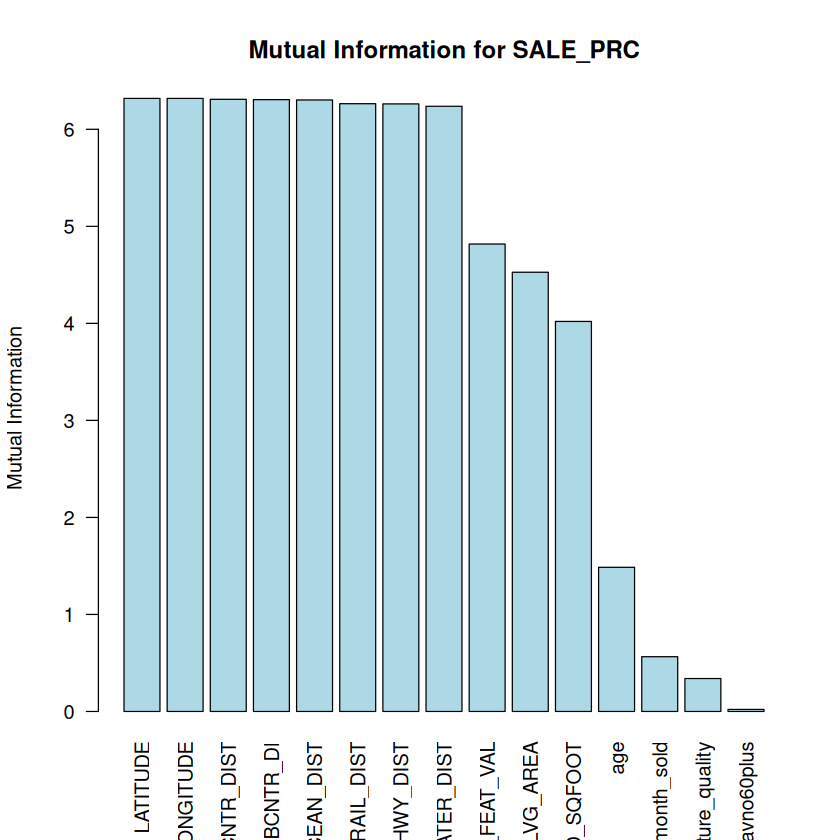

In [11]:
mi_values_sorted = sort(mi_values, decreasing = TRUE)
print(mi_values_sorted)

barplot(mi_values_sorted, las = 2, col = "lightblue",
        main = "Mutual Information for SALE_PRC",
        ylab = "Mutual Information")